# Reinforcement Learning

This notebook uses random Policy.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import random

from yahoo_finance import Share

## Helper functions

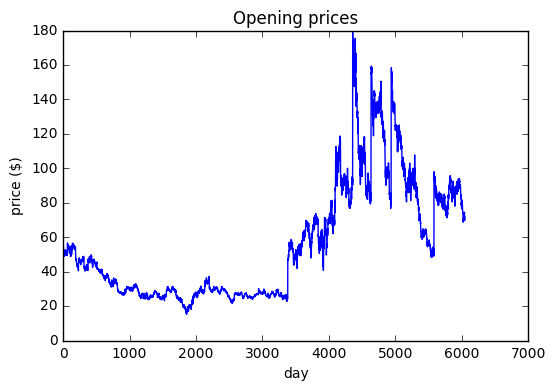

In [38]:
def get_prices(cache_filename='../datasets/stock_prices.npy'):
    return np.load(cache_filename).astype('float')

def plot_prices(prices):
    plt.title('Opening prices')
    plt.xlabel('day')
    plt.ylabel('price ($)')
    plt.plot(prices)
    plt.show()
    
plot_prices(get_prices()) 

## Implementation

Base Policy class

In [12]:
class DecisionPolicy:
    def select_action(self, current_state):
        pass
    
    def update_q(self, state, action, reward, next_state):
        pass

Random policy

In [23]:
class RandomDecisionPolicy(DecisionPolicy):
    def __init__(self, actions):
        self.actions = actions
        
    def select_action(self, current_state):
        """infer :: State -> Action"""
        action = random.choice(self.actions)
        return action

## Define simulation

In [86]:
def run_simulation(policy, initial_budget, initial_num_stocks, prices, hist):
    budget = initial_budget
    num_stocks = initial_num_stocks
    share_value = 0
    for i in range(len(prices)-hist-1):
#         if i % 100 == 0:
#             print('progress {:.2f}%'.format(float(100*i) / (len(prices)-hist-1)))
        current_state = np.asmatrix(np.hstack((prices[i:i+hist], budget, num_stocks)))
        current_portfolio = budget + num_stocks * share_value
        action = policy.select_action(current_state)
        share_value = prices[i+hist+1]
        if action == 'Buy' and budget >= share_value:
            budget -= share_value
            num_stocks += 1
        elif action =='Sell' and num_stocks > 0:
            budget += share_value
            num_stocks -= 1
        else:
            action = 'Hold'
        new_portfolio = budget + num_stocks * share_value
        reward = new_portfolio - current_portfolio
        next_state = np.asmatrix(np.hstack((prices[i+1:i+hist+1], budget, num_stocks)))
        policy.update_q(current_state, action, reward, next_state)
    portfolio = budget + num_stocks*share_value
    return portfolio

## Run simulation

In [103]:
prices = get_prices()
actions = ['Buy', 'Sell', 'Hold']
hist = 200
policy = RandomDecisionPolicy(actions)
budget = 1000.0
num_stocks = 0
portfolios = []
for i in range(50):
    portfolios.append(run_simulation(policy, budget, num_stocks, prices, hist))
print('Final portfolio mean: {:.2f}, stddev: {:.2f}'.format(np.mean(portfolios), np.std(portfolios)))

Final portfolio mean: 1692.52, stddev: 651.12
